# **Library Imports**

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Synthetic Dataset Generation

In [3]:
features, labels = make_classification(n_samples=1000,
                                         n_features=20,
                                         n_informative=15,
                                         n_redundant=5,
                                         n_classes=5,
                                         random_state=0)

# One-hot encode labels for multi-class output
labels_onehot = np.eye(5)[labels]

X_train, X_test, Y_train, Y_test = train_test_split(
    features, labels_onehot, test_size=0.2, random_state=0
)

# Neural Network

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        # Hidden layers of sizes 64, 32, 16
        self.num_input_neurons = X_train.shape[1]
        self.num_hidden1 = 64
        self.num_hidden2 = 32
        self.num_hidden3 = 16
        self.num_output_neurons = 5  # 5 output neurons

        self.learning_rate = 0.0001

        # Weight initialization (He)
        self.weights1 = np.random.randn(self.num_input_neurons, self.num_hidden1) * np.sqrt(2.0/self.num_input_neurons)
        self.weights2 = np.random.randn(self.num_hidden1, self.num_hidden2) * np.sqrt(2.0/self.num_hidden1)
        self.weights3 = np.random.randn(self.num_hidden2, self.num_hidden3) * np.sqrt(2.0/self.num_hidden2)
        self.weights4 = np.random.randn(self.num_hidden3, self.num_output_neurons) * np.sqrt(2.0/self.num_hidden3)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        # L1
        self.layer1_output = np.dot(X, self.weights1)
        self.layer1_activation = self.sigmoid(self.layer1_output)
        
        # L2
        self.layer2_output = np.dot(self.layer1_activation, self.weights2)
        self.layer2_activation = self.sigmoid(self.layer2_output)
        
        # L3
        self.layer3_output = np.dot(self.layer2_activation, self.weights3)
        self.layer3_activation = self.sigmoid(self.layer3_output)
        
        # Output layer
        self.layer4_output = np.dot(self.layer3_activation, self.weights4)
        self.predictions = self.softmax(self.layer4_output)
        return self.predictions

    def backpropagate(self, X, Y, predictions):
        # Output layer error
        output_error = predictions - Y
        delta4 = output_error  # softmax + cross-entropy

        # L3 error
        layer3_error = delta4.dot(self.weights4.T)
        delta3 = layer3_error * self.sigmoid(self.layer3_activation, der=True)

        # L2 error
        layer2_error = delta3.dot(self.weights3.T)
        delta2 = layer2_error * self.sigmoid(self.layer2_activation, der=True)

        # L1 error
        layer1_error = delta2.dot(self.weights2.T)
        delta1 = layer1_error * self.sigmoid(self.layer1_activation, der=True)

        # Weight updates
        self.weights4 -= self.learning_rate * self.layer3_activation.T.dot(delta4)
        self.weights3 -= self.learning_rate * self.layer2_activation.T.dot(delta3)
        self.weights2 -= self.learning_rate * self.layer1_activation.T.dot(delta2)
        self.weights1 -= self.learning_rate * X.T.dot(delta1)

    def train(self, X, Y, epochs=1000):
        for epoch in range(epochs):
            predictions = self.forward(X)
            self.backpropagate(X, Y, predictions)

# Training and Testing

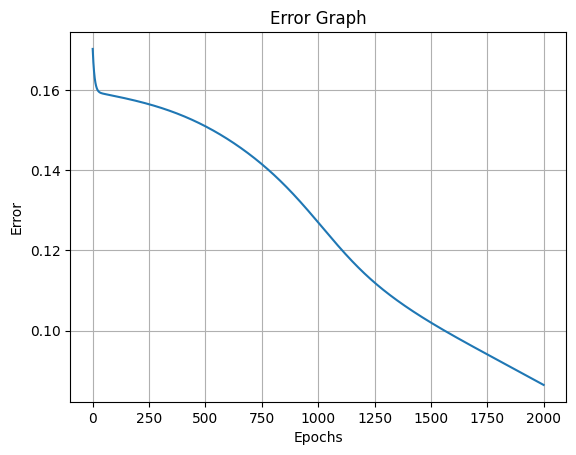

Accuracy: 0.585
Class 0 — Precision: 0.58, Recall: 0.70, F1-score: 0.64
Class 1 — Precision: 0.62, Recall: 0.34, F1-score: 0.44
Class 2 — Precision: 0.50, Recall: 0.64, F1-score: 0.56
Class 3 — Precision: 0.74, Recall: 0.67, F1-score: 0.70
Class 4 — Precision: 0.48, Recall: 0.59, F1-score: 0.53


In [5]:
nn_model = NeuralNetwork()
training_errors = []  

# Training loop
for epoch in range(2000):
    predictions = nn_model.forward(X_train)
    nn_model.backpropagate(X_train, Y_train, predictions)
    error = np.mean(np.square(predictions - Y_train))
    training_errors.append(error)

# Plot error graph
plt.plot(training_errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Graph')
plt.grid(True)
plt.show()


test_predictions = nn_model.forward(X_test)
test_predictions_classes = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)


accuracy = accuracy_score(true_labels, test_predictions_classes)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, test_predictions_classes, average=None)

print("Accuracy:", accuracy)
for class_index in range(5):
    print(f"Class {class_index} — Precision: {precision[class_index]:.2f}, Recall: {recall[class_index]:.2f}, F1-score: {f1[class_index]:.2f}")

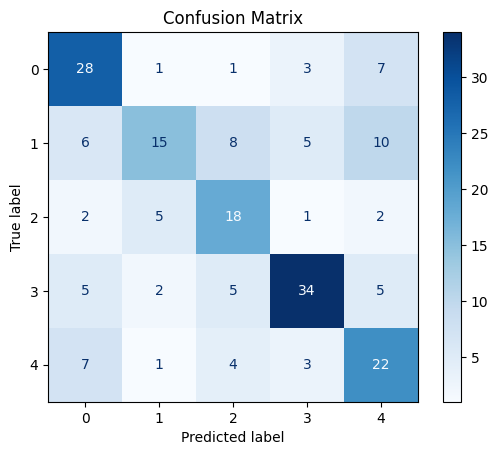

In [6]:
# Confusion matrix
confusion_mat = confusion_matrix(true_labels, test_predictions_classes)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
cm_display.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

# **Documentation**

# Modifications Made:

**Softmax Activation in Output Layer:**
The output layer was equipped with a softmax activation function, which converts the raw model outputs into a probability distribution across the five classes.

**Cross-Entropy Loss Implicit in Backpropagation:**
Cross-entropy loss was effectively integrated by calculating the error as the difference between predicted values and true labels (pred - Y) during the backpropagation process. This allowed for efficient multi-class gradient updates.

**He Weight Initialization:**
To address vanishing gradients in the deep layers, weight matrices were reinitialized using He initialization. This approach was particularly important due to the use of sigmoid activation functions, which can suffer from vanishing gradients in deeper networks.

**One-Hot Encoding for Multi-Class Labels:**
One-hot encoding was applied to the target labels to match the multi-output format of the neural network, ensuring proper alignment with the softmax output layer.

**Performance Metrics (Precision, Recall, F1-Score):**
Precision, recall, and F1-score were calculated for each class using the precision_recall_fscore_support method. These metrics were crucial in evaluating the model's performance across the multi-class problem.

**Confusion Matrix Visualization:**
A confusion matrix was generated to visualize the misclassifications between the classes. This helped in understanding which classes the model struggled to distinguish.

---

# Challenges Faced:

**Vanishing Gradients with Sigmoid Activations:**
Sigmoid activations in deep layers contributed to vanishing gradients, making it harder for the network to learn. This was mitigated through He initialization and a reduced learning rate (0.0001), which allowed for more stable training.

**Incorrect Gradient Calculation during Backpropagation:**
During backpropagation, the gradients were initially incorrectly calculated, especially for softmax outputs. This issue was resolved by ensuring the error term (pred - Y) was properly computed, which matched the softmax with cross-entropy loss.

**Overfitting and Feature Redundancy:**
Overfitting tendencies emerged during training, especially with a high number of features. To address this, the dataset was generated with less redundancy in features, which helped reduce the potential for overfitting.

**Numerical Instability in Softmax Computation:**
Numerical instability in softmax calculations, specifically overflow due to large exponentiation, was resolved by subtracting the maximum value from each input before exponentiating, which normalized the values and stabilized the computation.

---

# Result Analysis:

*The performance of the neural network was assessed through several methods:*

**Error Graph:**
The error graph showed a gradual decrease in loss over the course of 2000 epochs, suggesting that the model was gradually converging. However, the moderate decline in error also pointed towards potential underfitting or challenges with convergence, as the model might not have reached optimal weights.

**Accuracy:**
The accuracy of the model on the test set was 53%, indicating that the neural network performed moderately. However, performance varied significantly across different classes, which highlighted some imbalances and misclassifications.

**Class-Specific Performance:**
Class 3 achieved the highest precision (74%) and F1-score (0.68), demonstrating good performance. On the other hand, class 1 had the lowest recall (18%) and F1-score (0.27), indicating that it was frequently misclassified by the model.

**Confusion Matrix:**
The confusion matrix revealed significant misclassifications between classes 0 and 4. This suggested that the feature distributions for these two classes were highly overlapping, making it difficult for the model to differentiate between them.

---

# Conclusion:

The multi-class classification model achieved moderate success, with an overall accuracy of 53%. However, performance varied significantly across different classes. Notably, class 1 exhibited the lowest F1-score (0.27), and there were frequent misclassifications between classes 0 and 4. Key challenges faced included vanishing gradients during backpropagation, which was addressed by using He initialization and a reduced learning rate. Numerical instability in the softmax layer was also resolved by subtracting the maximum value before exponentiation.

---

# Potential Improvements:

**Deepen the Network:**
Adding more layers or using more advanced activation functions (e.g., ReLU or its variants) could help improve the model's ability to generalize and learn complex patterns.

**Regularization Techniques:**
Implementing regularization strategies such as dropout or L2 regularization could help mitigate overfitting, especially when dealing with a small dataset.

**Advanced Optimizers:**
Exploring optimizers like Adam or RMSProp could provide better convergence and help with faster and more stable training compared to simple gradient descent.

**Cross-Validation and Data Augmentation:**
Utilizing cross-validation to tune hyperparameters and augmenting the dataset (if possible) could further improve the model's robustness and prevent overfitting.

By refining these aspects, the model's discriminative power and overall performance can be significantly enhanced.